In [3]:
%matplotlib inline

In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms

In [5]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
trainset = torchvision.datasets.CIFAR10(root="../data", train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root="../data", train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)
classes = (
    "plane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"
)

Files already downloaded and verified
Files already downloaded and verified


 deer   car horse  ship


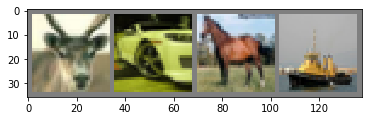

In [6]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

dataiter = iter(trainloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))

print(" ".join("%5s" % classes[labels[j]] for j in range(4)))


In [7]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        # nn.Conv2d(input channels, output channels, kernel size)
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # nn.Linear(input, output)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), 2)
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, 16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

In [9]:
gpu = torch.device("cuda:0")
net.to(gpu)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [11]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [12]:
for epoch in range(2):
    running_loss = .0
    for index, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(gpu), labels.to(gpu)

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if index % 2000 == 1999:
            print(f"Epoch {epoch+1} Batch {index+1} Average loss {running_loss/2000}")
            running_loss = .0

Epoch 1 Batch 2000 Average loss 2.18657561185956
Epoch 1 Batch 4000 Average loss 1.8538429730534554
Epoch 1 Batch 6000 Average loss 1.6705618171989918
Epoch 1 Batch 8000 Average loss 1.5700407889783383
Epoch 1 Batch 10000 Average loss 1.5221745347380637
Epoch 1 Batch 12000 Average loss 1.4523432529568672
Epoch 2 Batch 2000 Average loss 1.3941069245487452
Epoch 2 Batch 4000 Average loss 1.3804541480988264
Epoch 2 Batch 6000 Average loss 1.339003345489502
Epoch 2 Batch 8000 Average loss 1.2935125147998332
Epoch 2 Batch 10000 Average loss 1.2882981096804142
Epoch 2 Batch 12000 Average loss 1.269705562993884


GroundTruth:    cat  ship  ship plane


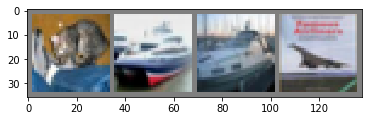

In [14]:
dataiter = iter(testloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [15]:
images, labels = images.to(gpu), labels.to(gpu)
outputs = net(images)

In [20]:
_, predicted = torch.max(outputs, 1)
print(predicted)

tensor([3, 8, 1, 8], device='cuda:0')
